###1.Можно ли отобрать наиболее значимые признаки из имеющихся с помощью PCA? Ответ объясните.

####Да, можно отобрать наиболее значимые признаки из имеющихся с помощью метода главных компонент (PCA).

####PCA используется для уменьшения размерности данных путем проецирования данных на новую ось, называемую осью главной компоненты. Главные компоненты являются линейными комбинациями исходных признаков, и первые главные компоненты объясняют большую часть дисперсии данных.

####Поэтому, если мы выбираем первые k главных компонент, мы можем сократить количество признаков до k. Это позволит сохранить наиболее значимые признаки, которые являются наиболее информативными и наиболее сильно влияют на данные.

####Также можно рассмотреть вклад каждого признака в каждую главную компоненту и отобрать те признаки, которые имеют наибольший вклад в первые k главных компонент. Таким образом, мы можем выбрать только наиболее важные признаки для дальнейшего анализа.


###(*)2.Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции numpy.linalg.svd(). Применить к данным на уроке и сравнить ответ

In [1]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [3]:
def pca_svd(X, k):
  X_centr = (X-np.mean(X, axis=0))/np.std(X, axis=0) #нормализация данных
  U, S, Vt = np.linalg.svd(X_centr, full_matrices=False) #сингулярное разложение
  V = Vt.T
  W = V[:,:k]*np.sqrt(S[:k])  #вычисление матрицы весов признаков
  var_exp = [(i / sum(S))*100 for i in sorted(S, reverse=True)]
  cum_var_exp = np.cumsum(var_exp)
  print(f'кумулятивная доля дисперсии по компонентам: {cum_var_exp}')
  return W  

In [4]:
W = pca_svd(X, 2)

кумулятивная доля дисперсии по компонентам: [ 53.52971788  83.48653067  95.49021308 100.        ]


In [5]:
Z = X.dot(W)

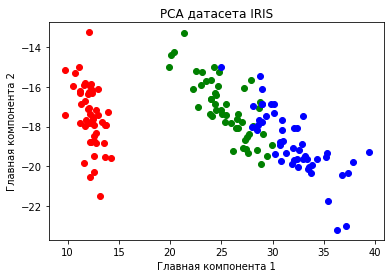

In [6]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()